In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

# Display all rows and cols
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
train_dataset = pd.read_csv('data/train.csv')
test_dataset = pd.read_csv('data/test.csv')

In [4]:
# Store id from test dataset separately and drop it
ID_TEST = test_dataset['id']
test_dataset.drop('id', axis=1, inplace=True)

# Drop id from train dataset
train_dataset.drop('id', axis=1, inplace=True)

In [5]:
rows_train = train_dataset.shape[0]

In [6]:
train_dataset.head(5)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [7]:
print train_dataset.shape
train_dataset.describe()

(188318, 131)


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [8]:
# Skewness of dataset
# Should be close to 0
train_dataset.skew()

# loss is most skewed

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64

In [9]:
numeric_data_train = train_dataset.select_dtypes(include=['float64'])
numeric_cols = numeric_data_train.columns

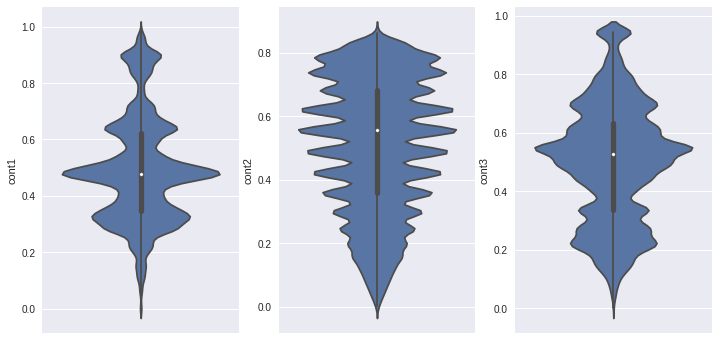

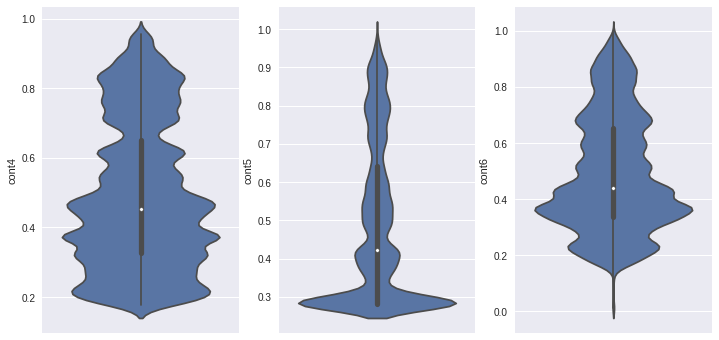

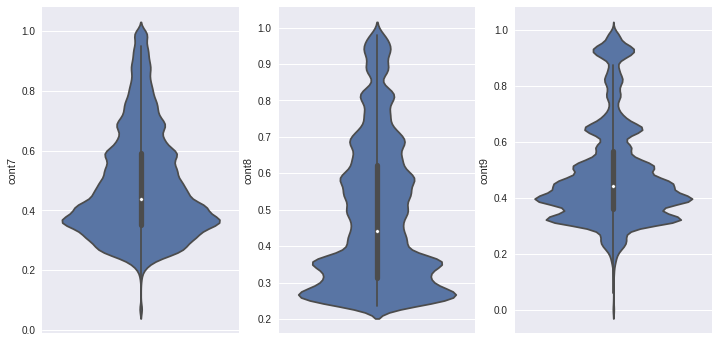

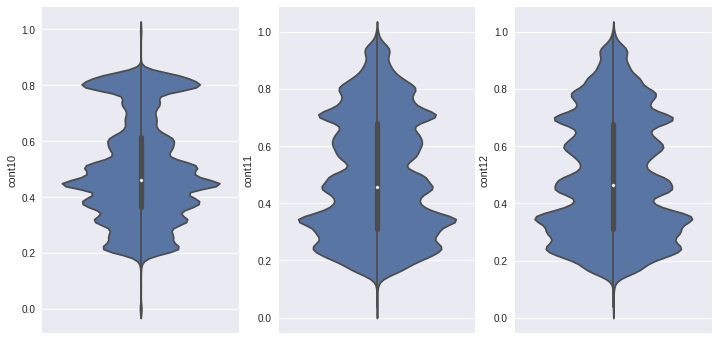

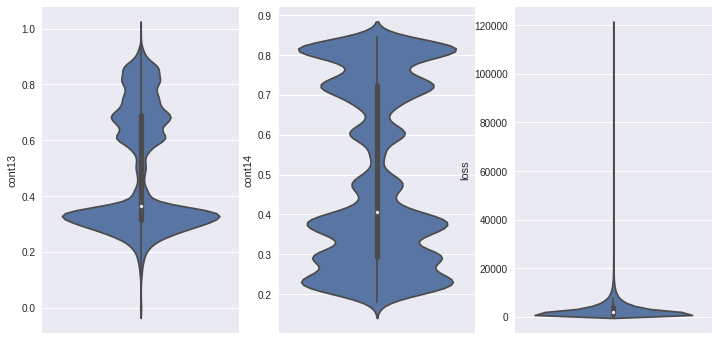

In [10]:
# Violin plots for numeric attributes
n_cols = 3
n_rows = (len(numeric_cols) / n_cols) + (len(numeric_cols) % n_cols)

for i in xrange(n_rows):
    fig, ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(12, 6))
    for j in xrange(n_cols):
        sns.violinplot(y=numeric_cols[i*n_cols + j], data=numeric_data_train, ax=ax[j])
        
# loss is heavily skewed

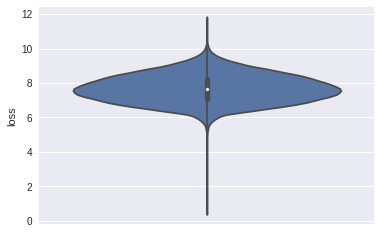

In [11]:
# skew correction
train_dataset['loss'] = np.log1p(train_dataset['loss'])
sns.violinplot(y='loss', data=train_dataset)
plt.show()

In [12]:
# Drop 'loss' from continuous data
numeric_data_train.drop('loss', axis=1, inplace=True)

/home/dheeraj/my-repos/kaggle-allstate-claims/env/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
# Calculate pearson coefficient
corr_train_data = numeric_data_train.corr()
corr_train_data

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
cont1,1.000000,-0.085180,-0.445431,0.367549,-0.025230,0.758315,0.367384,0.361163,0.929912,0.808551,0.596090,0.614225,0.534850,0.056688
cont2,-0.085180,1.000000,0.455861,0.038693,0.191427,0.015864,0.048187,0.137468,-0.032729,0.063526,0.116824,0.106250,0.023335,-0.045584
cont3,-0.445431,0.455861,1.000000,-0.341633,0.089417,-0.349278,0.097516,-0.185432,-0.417054,-0.325562,0.025271,0.006111,-0.418203,-0.039592
cont4,0.367549,0.038693,-0.341633,1.000000,0.163748,0.220932,-0.115064,0.528740,0.328961,0.283294,0.120927,0.130453,0.179342,0.017445
cont5,-0.025230,0.191427,0.089417,0.163748,1.000000,-0.149810,-0.249344,0.009015,-0.088202,-0.064967,-0.151548,-0.148217,-0.082915,-0.021638
cont6,0.758315,0.015864,-0.349278,0.220932,-0.149810,1.000000,0.658918,0.437437,0.797544,0.883351,0.773745,0.785144,0.815091,0.042178
cont7,0.367384,0.048187,0.097516,-0.115064,-0.249344,0.658918,1.000000,0.142042,0.384343,0.492621,0.747108,0.742712,0.288395,0.022286
cont8,0.361163,0.137468,-0.185432,0.528740,0.009015,0.437437,0.142042,1.000000,0.452658,0.336588,0.302381,0.315904,0.476402,0.043539
cont9,0.929912,-0.032729,-0.417054,0.328961,-0.088202,0.797544,0.384343,0.452658,1.000000,0.785697,0.608000,0.626656,0.642028,0.074154
cont10,0.808551,0.063526,-0.325562,0.283294,-0.064967,0.883351,0.492621,0.336588,0.785697,1.000000,0.702896,0.713812,0.707876,0.041808


In [14]:
# Correlation threshold
corr_threshold = 0.5

n_cont_features = len(corr_train_data.columns)

high_corrs = []

# Find features with correaltion more than or equal to the threshold
for i in xrange(0, n_cont_features):
    for j in xrange(i+1, n_cont_features):
        corr = corr_train_data.iloc[i,j]
        if abs(corr) >= corr_threshold:
            high_corrs.append(((corr_train_data.columns[i], corr_train_data.columns[j]), corr))

sorted_corrs = sorted(high_corrs, key=lambda x: -abs(x[1])) # -abs for descending order

# correlations in descending order
for corr in sorted_corrs:
    print "{} and {} -------> {:.3f}".format(corr[0][0], corr[0][1], corr[1])

cont11 and cont12 -------> 0.994
cont1 and cont9 -------> 0.930
cont6 and cont10 -------> 0.883
cont6 and cont13 -------> 0.815
cont1 and cont10 -------> 0.809
cont6 and cont9 -------> 0.798
cont9 and cont10 -------> 0.786
cont6 and cont12 -------> 0.785
cont6 and cont11 -------> 0.774
cont1 and cont6 -------> 0.758
cont7 and cont11 -------> 0.747
cont7 and cont12 -------> 0.743
cont10 and cont12 -------> 0.714
cont10 and cont13 -------> 0.708
cont10 and cont11 -------> 0.703
cont6 and cont7 -------> 0.659
cont9 and cont13 -------> 0.642
cont9 and cont12 -------> 0.627
cont1 and cont12 -------> 0.614
cont9 and cont11 -------> 0.608
cont1 and cont11 -------> 0.596
cont1 and cont13 -------> 0.535
cont4 and cont8 -------> 0.529


/home/dheeraj/my-repos/kaggle-allstate-claims/env/local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


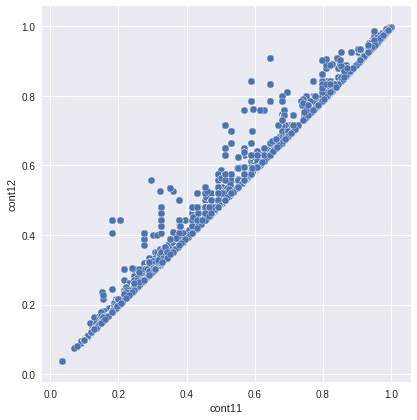

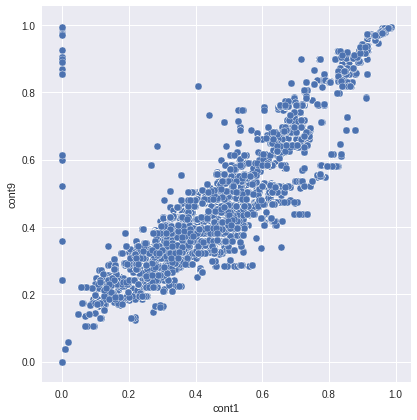

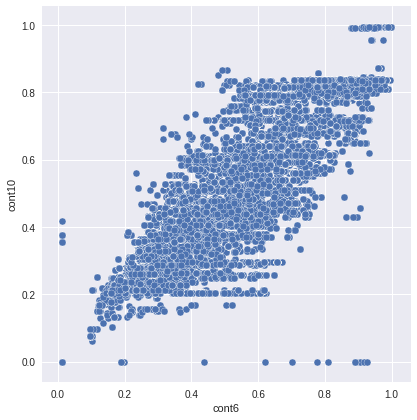

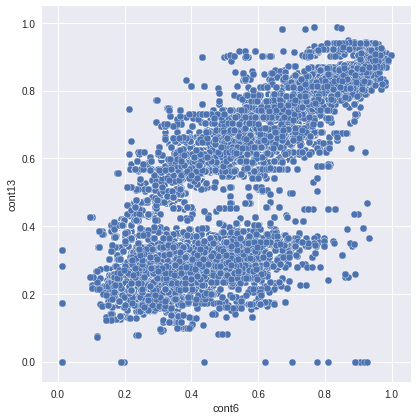

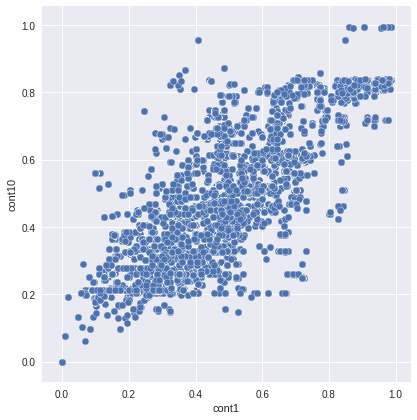

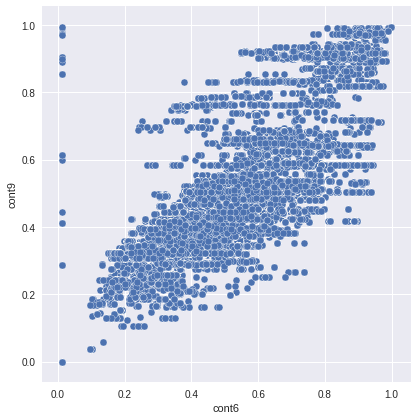

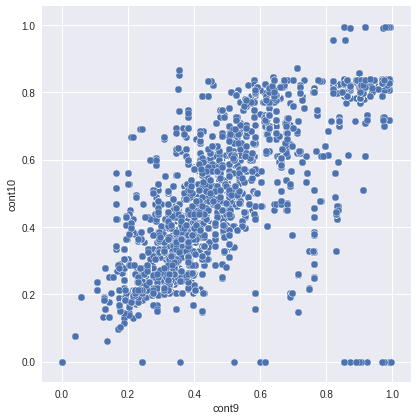

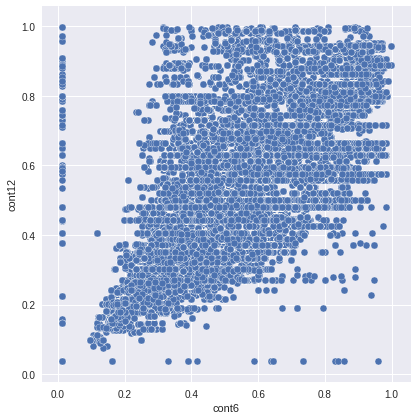

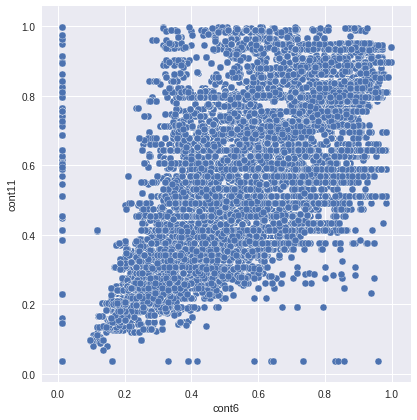

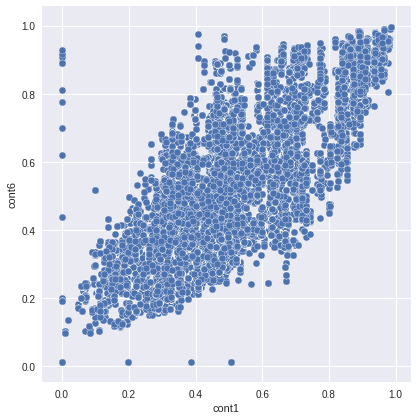

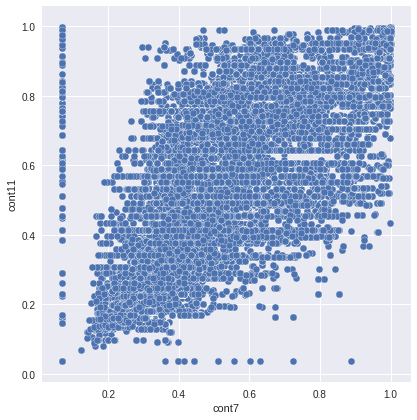

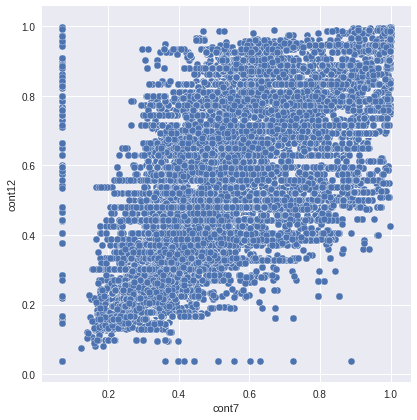

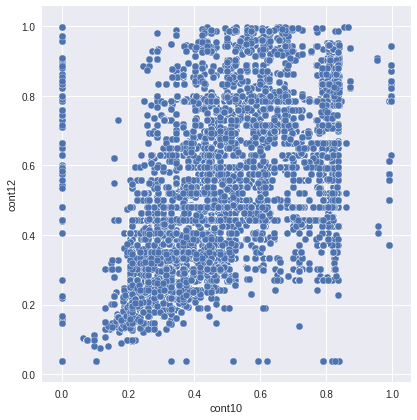

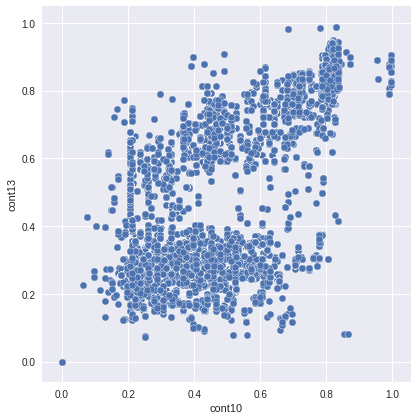

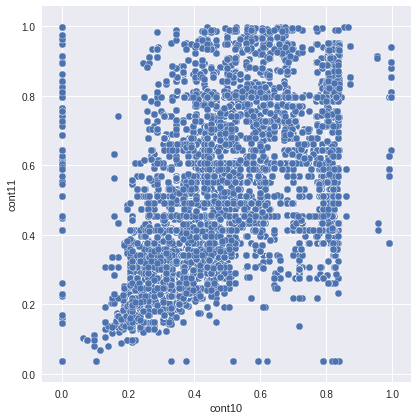

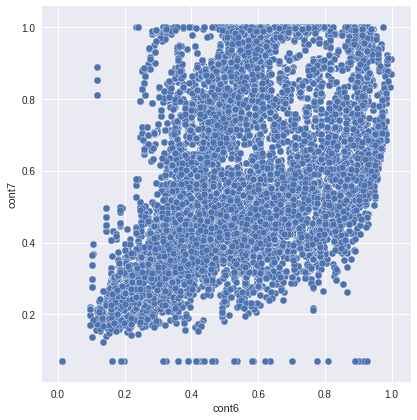

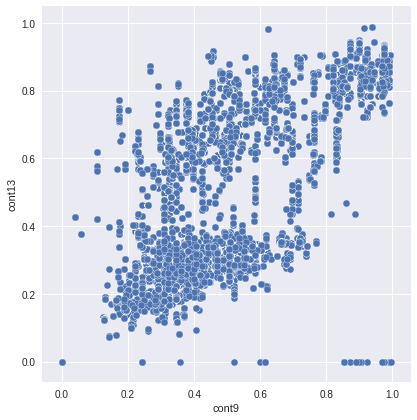

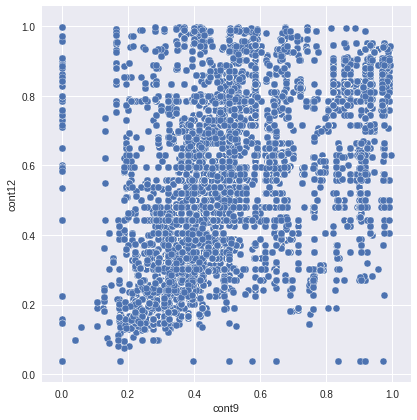

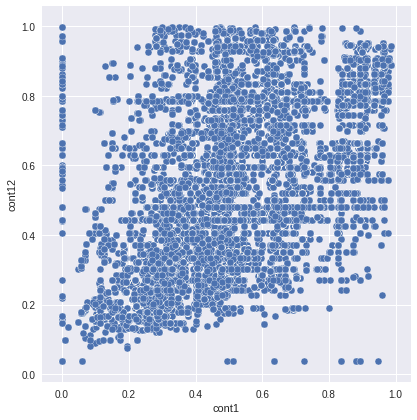

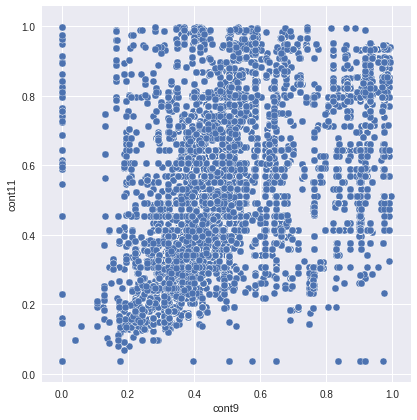

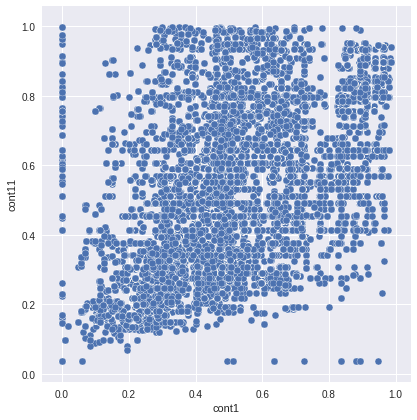

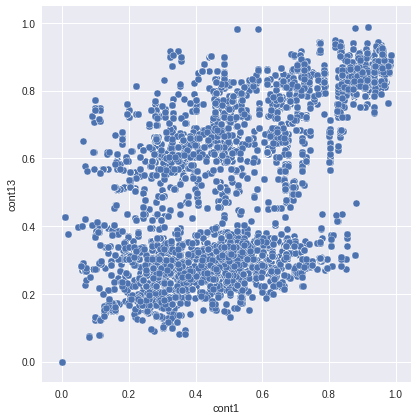

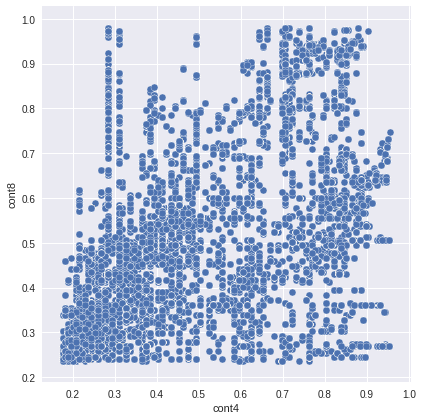

In [15]:
# Scatter plot of highly correlated feature pairs
for pair, corr in sorted_corrs:
    sns.pairplot(data=train_dataset, x_vars=pair[0], y_vars=pair[1], size=6)
plt.show()

In [16]:
# Data preparation

# Encode categorical variables
labels = {} # holds list of unique categorical vars

cat_cols = train_dataset.select_dtypes(include=['object']).columns

for col in cat_cols:
    # take unique cols from both train and test sets so that no variables are missed
    unique_cat_train = train_dataset[col].unique()
    unique_cat_test = test_dataset[col].unique()
    labels[col] = (list(set(unique_cat_train) | set(unique_cat_test)))


In [17]:
# Data preparation

all_dataset = train_dataset.append(test_dataset)
all_dataset.drop('loss', axis=1, inplace=True)

# Label encode
all_dataset = pd.get_dummies(all_dataset)

In [18]:
# Split into train and test set

train = all_dataset.iloc[0: rows_train]
test = all_dataset.iloc[rows_train:]

# Split train dataset into train and cross-validation set

x_train, x_val, y_train, y_val = train_test_split(train, train_dataset['loss'], test_size=0.2, random_state=7)